<a href="https://colab.research.google.com/github/acmenoita/Pratical-Machine-Learning/blob/main/Winequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white (1).csv


In [3]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
df= pd.read_csv('winequality-white.csv', sep=';')


In [6]:
#Separar as variaveis x(independente) y(alvo)
X = df.drop("quality", axis=1).values
y = df["quality"].values.reshape(-1, 1)

In [7]:
#Normalizar os dados - descida de gradiente
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

In [8]:
#Tensores Pytorch
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [9]:
input_size = X_tensor.shape[1]  #11 variáveis
output_size = 1                 #1 previsão: qualidade

In [10]:
#Modelo linear simples
model = nn.Linear(input_size, output_size)

In [11]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [12]:
#Treinar
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    #Forward Pass
    predictions = model(X_tensor)

    #Calcular a perda
    loss = loss_function(predictions, y_tensor)
    losses.append(loss.item())

    #Backward Pass
    optimizer.zero_grad()  #Limpar os gradientes anteriores
    loss.backward()        #Calcular novos gradientes
    optimizer.step()       #Atualizar os pesos com gradiente descendente

    if epoch % 10 == 0:
        print(f'Época {epoch} - Perda: {loss.item():.4f}')

#Prever o modelo treinado
with torch.no_grad():
    y_pred = model(X_tensor).numpy()

Época 0 - Perda: 39.1406
Época 10 - Perda: 26.1115
Época 20 - Perda: 17.5816
Época 30 - Perda: 11.9283
Época 40 - Perda: 8.1625
Época 50 - Perda: 5.6487
Época 60 - Perda: 3.9689
Época 70 - Perda: 2.8458
Época 80 - Perda: 2.0946
Época 90 - Perda: 1.5919


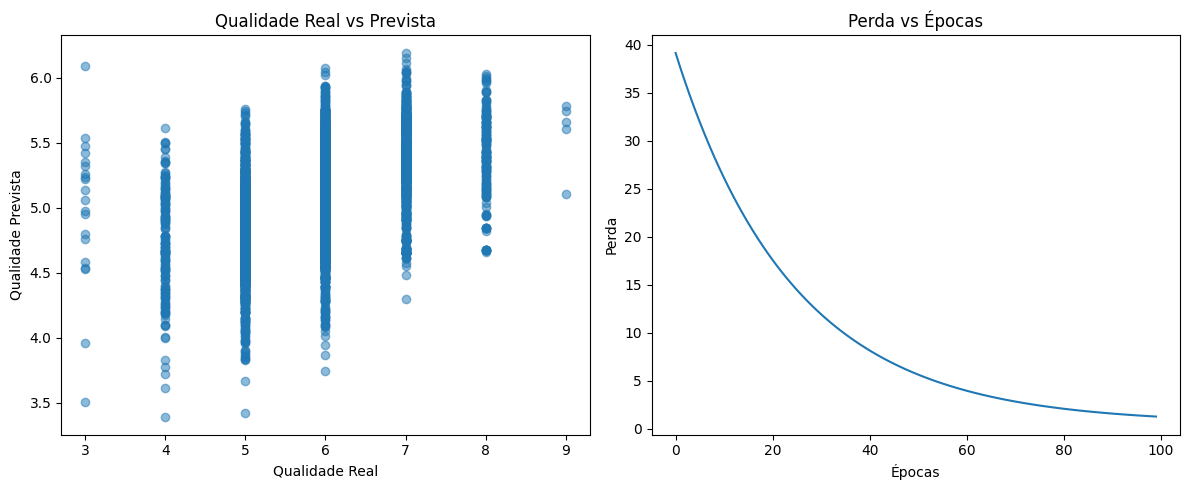

In [13]:
#Graficos
plt.figure(figsize=(12, 5))

#Real vs Previsto
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Qualidade Real")
plt.ylabel("Qualidade Prevista")
plt.title("Qualidade Real vs Prevista")

#Perda vs Épocas
plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), losses)
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.title("Perda vs Épocas")

plt.tight_layout()
plt.show()